In [71]:
import websocket
import time
import numpy as np

In [76]:
t = time.time()
f = []
data = []

def on_message(wsapp, message):
    global t, data
    f.append(1/(time.time()-t))
    t = time.time()
    print(f'period: {1/np.mean(f)}, freq: {np.mean(f)}')
    data = message

# websocket.setdefaulttimeout(5)
ws = websocket.WebSocketApp("ws://192.168.0.150:80", on_message=on_message)

try:
    ws.run_forever()
except KeyboardInterrupt:
    print("closing socket")
ws.close()

period: 0.3688418865203857, freq: 2.711188822489472
period: 0.07253097171064966, freq: 13.787213605648837
period: 0.0924876837678236, freq: 10.812250445263063
period: 0.10677716336599712, freq: 9.365298425959564
period: 0.11809062893186421, freq: 8.468072437627365
period: 0.12636764034932557, freq: 7.913418318452735
period: 0.13339537038331087, freq: 7.496512038809933
period: 0.13915377657496159, freq: 7.186294361628798
period: 0.14398786028881713, freq: 6.945029935122005
period: 0.14827408999090028, freq: 6.744266648754149
period: 0.15171831726326668, freq: 6.591161950898563
period: 0.15495686647553875, freq: 6.453408762998305
period: 0.15758601397590188, freq: 6.345740810176976
period: 0.16014591683930923, freq: 6.244305316902973
period: 0.16243413800410103, freq: 6.15634134725271
period: 0.16425652164418675, freq: 6.088038331690749
period: 0.1661903274826545, freq: 6.0171973612866925
period: 0.167717795455877, freq: 5.962396520189647
period: 0.16887980532897848, freq: 5.921371108001

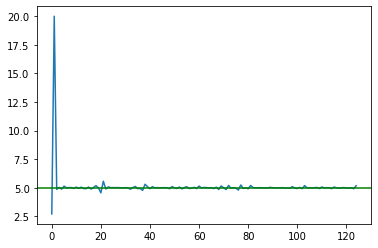

In [78]:
import matplotlib.pyplot as plt
plt.plot(np.minimum(f, 20))
plt.axhline(np.mean(f[20:]), c='g')

In [55]:
x = (0.02*np.arange(12)).reshape((4, 3))
buffer

array([[0.  , 0.02, 0.04],
       [0.06, 0.08, 0.1 ],
       [0.12, 0.14, 0.16],
       [0.18, 0.2 , 0.22]])

In [69]:
buffer = bytearray(b"5\x85\x8f<\xb5\xdd\x19<:\xe5\x85<\xf7\n\x88\xbb\x12\x16.\xbc\x96\xef\x9e\xba\xf3:p\xbc\xdc\xd8\x1f<\x19\x1c\x80<\x1c\x9c\xd8:\x18\xbc\xb2<\x82T\x85\xbc'_\x83\xba\xc1a\x98;\xd0o\xd6\xbb\xe3p-<")
np.frombuffer(buffer, dtype=np.float32).reshape((4,4))

array([[ 0.01751957,  0.00939124,  0.01634466, -0.0041517 ],
       [-0.01062538, -0.00121258, -0.01466249,  0.00975629],
       [ 0.0156384 ,  0.0016526 ,  0.02181821, -0.01627565],
       [-0.00100229,  0.00465033, -0.00654409,  0.010586  ]],
      dtype=float32)

In [83]:
Cxx = np.array([[166.14279703,  99.48821575,  24.11370662, -33.37944544],
       [ 99.48821575, 166.12703417,  90.66107192,  71.18545196],
       [ 24.11370662,  90.66107192, 166.83747439,  66.71419887],
       [-33.37944544,  71.18545196,  66.71419887, 166.71542984]])

# Y correlation matrix
Cyy = np.array([[167.        ,   0.43605292,   1.06028619,  -0.1970634 ],
       [  0.43605292, 167.        ,   0.41206453,  -0.69571169],
       [  1.06028619,   0.41206453, 167.        ,  -5.19137319],
       [ -0.1970634 ,  -0.69571169,  -5.19137319, 167.        ]])

# XY cross-correlation matrix
Cxy = np.array([[18.49359001, -0.09579883, -1.47948752,  5.81688046],
       [ 9.60223537,  7.45818488, -1.80016572,  7.20337205],
       [17.57176942, -8.21102309, -0.50311062,  1.26140711],
       [-4.71848465, 15.03455974, -0.45756603,  1.86271787]])

M1 = np.dot(np.linalg.inv(Cxx), Cxy)
M2 = np.dot(np.linalg.inv(Cyy), Cxy.transpose())
M = np.dot(M1, M2)

M

array([[ 0.01751957,  0.00939124,  0.01634466, -0.0041517 ],
       [-0.01062538, -0.00121258, -0.01466249,  0.00975629],
       [ 0.0156384 ,  0.0016526 ,  0.02181821, -0.01627564],
       [-0.00100228,  0.00465033, -0.00654409,  0.010586  ]])

In [79]:
ws = websocket.WebSocket()
ws.connect("ws://192.168.0.150:80")

ws.recv()

'array([[0.01751957, 0.009391238, 0.01634465, -0.004151698],\n       [-0.01062538, -0.001212584, -0.01466249, 0.009756293],\n       [0.0156384, 0.001652602, 0.02181821, -0.01627565],\n       [-0.001002286, 0.004650325, -0.00654409, 0.010586]], dtype=float32)'

In [9]:
import hashlib

hashlib.sha256(b'james').hexdigest()

def crc16(data : bytearray, offset , length):
    if data is None or offset < 0 or offset > len(data)- 1 and offset+length > len(data):
        return 0
    crc = 0xFFFF
    for i in range(0, length):
        crc ^= data[offset + i] << 8
        for j in range(0,8):
            if (crc & 0x8000) > 0:
                crc =(crc << 1) ^ 0x1021
            else:
                crc = crc << 1
    return crc & 0xFFFF

crc16(b'james', 0, 4)

22679